# Chapter 5 - Matrices, Part 1

A `matrix` is a _vector_ taken to the next level.

Characteristics:
- highly versatile (sets of equations, geometric transformations, positions of particles over time, financial records, and etc)

In _data science_, they are called `data tables`. `Rows` correspond to _observations_ (e.g. customers), and `columns` to _features_ (e.g. purchases)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz

# Note; these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

In [ ]:
v = np.array([[1,2,3]]).T # col vector
w = np.array([[10,20]]) #row vector
v + w

# Creating and Visualizing Matrices in NumPy

## Visualizing, Indexing, and Slicing Matrices

In [ ]:
# create some matrices
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))

# and show them as images
fig,axs = plt.subplots(1,3,figsize=(10,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): 
    axs[i].axis('off')
plt.tight_layout()
plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

## Slicing out rows and columns

In [ ]:
# create a matrix
A = np.arange(60).reshape(6,10)
print('Original matrix:\n')
print(A)

In [ ]:
# get the [row_start:row_end:row_step, col_start:col_end:col_step]
sub = A[1:4:1,0:5:1]
print('Submatrix:\n')
print(sub)

In [ ]:
# get the n-th row
print(A[1,:])

In [ ]:
# get the n-th column
print(A[:,1])

In [ ]:
# multiple rows
A[0:2,:]

In [ ]:
# multiple columns
A[:,1:]

# Special Matrices

## Random numbers matrix

In [ ]:
Mrows = 4 #shape 0
Ncols = 6 #shape 1
A = np.random.randn(Mrows,Ncols)

# Square versus nonsquare

## Diagonal

`np.diag()` has 2 behaviors depending on the input:
- matrix - will return the diagonal elements as a _vector_
- vector - will return the diagonal elements as a _matrix_

In [ ]:
#??np.diag

## Triangular

It contains all zeros either above or below the main diagonal.

**Upper triangular** - non-zero elements are above the diagonal.

**Lower triangular** - non-zero elements are below the diagonal.

In [ ]:
# extract the upper trianlge of matrix
#np.triu()

# extract the lower trianlge of matrix
#np.tril()

## Identity

One of the most important special matrices. It is a square diagonal matrix with all diagonal elements having a value of 1.

In [ ]:
#??np.eye()

## Zeros

In [ ]:
#np.zeros()

# Figure 5-2

In [ ]:
## create some matrices

# square
M1 = np.random.permutation(16).reshape(4,4)

# upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3)))

# lower-triangular rectangular
M3 = np.tril(np.random.randint(8,16,(3,5)))

# diagonal
M4 = np.diag(np.random.randint(0,6,size=8))

# identity
M5 = np.eye(4, dtype=int)

# zeros
M6 = np.zeros((4,5), dtype=int)

matrices = [M1,M2,M3,M4,M5,M6]
matLabels = ['Square', 'Upper-triangular', 'Lower-triangular', 'Diagonal', 
             'Identity', 'Zeros']

_,axs = plt.subplots(2,3,figsize=(12,6))
axs = axs.flatten()

for mi,M in enumerate(matrices):
    axs[mi].imshow(M, cmap='gray', origin='upper',
                  vmin=np.min(M),vmax=np.max(M))
    axs[mi].set(xticks=[], yticks=[])
    axs[mi].set_title(matLabels[mi])
    
    # text labels
    for (j,i), num in np.ndenumerate(M):
        axs[mi].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',
                    fontweight='bold')

plt.savefig('Figure_05_02.png', dpi=300)
plt.tight_layout()
plt.show()

# Matrix Math:

2 categories:
1. intuitive - element-wise procedures
2. unintuitive - 

## Addition and Subtraction

## "Shifting" a Matrix
As with vectors, it is not formally possible to add a scalar to a matrix. Python allows such an operation (e.g., 3+np.eye(2)), which involves broadcastadding the scalar to each element of the matrix. That is a convenient computation, but it is not formally a linear algebra operation.

Shifting - Linear-Algebra way to add a scaler to a square matrix

In [ ]:
A = np.array([[4,5,1], [0,1,11], [4,9,7]])
s = 6
A + s # NOT shifting!
A + s*np.eye(len(A)) # shifting

## Scalar and Hadamard Multiplications

2 types of multiplication:
1. `Scalar-matrix multiplication` - multiply each element in the matrix by the same scalar.
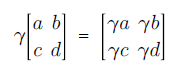
2. `Hadamard multiplication` - involves multiplying 2 matrices element-wise
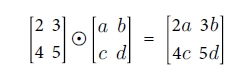

Hadamard multiplication is indicated as (**A ⊙ B**)

In [ ]:
A = np.random.randn(3,4)
B = np.random.randn(3,4)

A*B # Hadamard multiplication
np.multiply(A,B) # also Hadamard
# A@B # NOT Hadamard!

# Standard Matrix Multiplication

## Rules
The matrix multiplication is valid if:
- no. of cols in the left matrix = no. rows in the right matrix

Size of the product:
- no. or rows in the left matrix & no. of cols in the right matrix

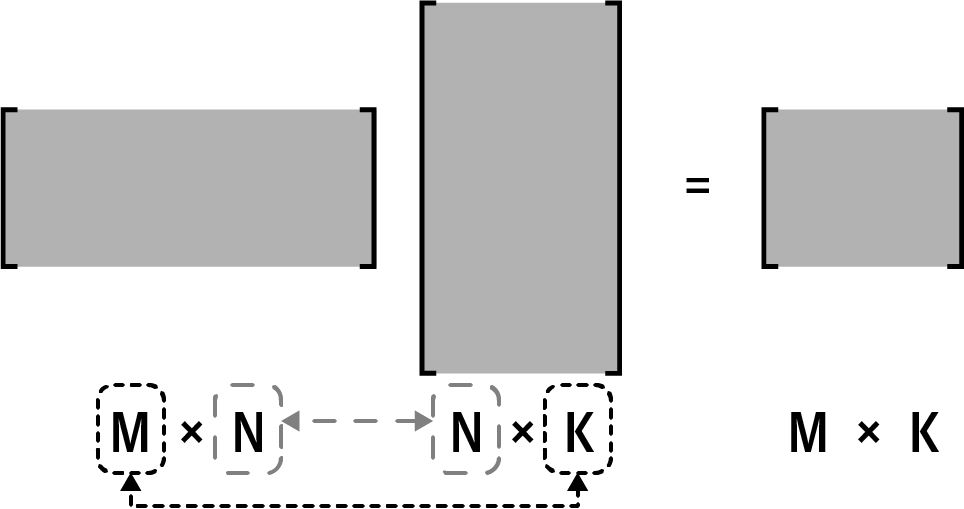

"It does NOT obey the commutative law"

Matrix is indicated as 2 matrices
"**AB**"

In [ ]:
# Create a few matrices
A = np.random.randn(3,6)
B = np.random.randn(6,4)
C = np.random.randn(6,4)

# try some multiplications, and print out the shape of the product matrix
print( (A@B).shape )
print( np.dot(A,B).shape ) # same result as above
# print( (B@C).shape ) # ValueError
print( (A@C).shape )

In [ ]:
# Note/reminder:

# This is Hadamard (element-wise) multiplication:
print( np.multiply(B,C) ), print(' ')

# This is matrix multiplication
print( np.dot(B,C.T) )

# demonstration that they are equals:
# np.dot(B,C.T)-B@C.T

# Mechanics and Interpretation of Matrix Multiplication

It is valid only because the (_i,j_) element in the product matrix is the dot product between the ith row of the left matrix and the jth column in the right matrix.

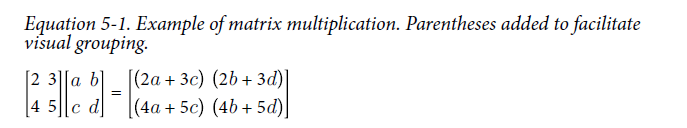

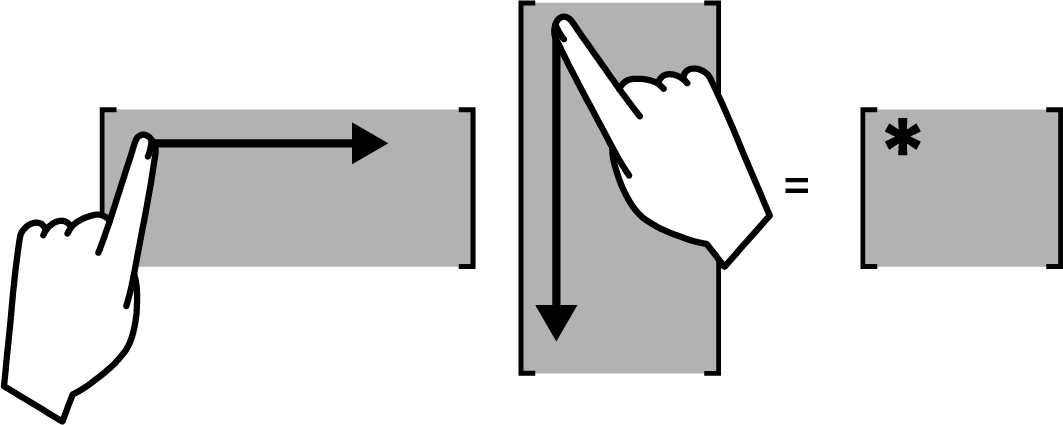

How do you interpret matrix multiplications?
- The result of matrix multiplication is a matrix that stores all the pairwise linear relationships between rows of the left matrix and column of the right matrix.

This is the basis for computing
- covariance
- correlation matrices
- general linear model (ANOVAs and regressions)
- singular-value decomposition
- others

# Matrix-Vector Multiplication

**What?**
Each row of the matrix combines with the vector to create on number.

**When?**
The vector must have the same number of entries as there are columns in the matrix. Think of the vector fitting perfectly into each row of the matrix.

**Result**
- It is always a _vector_.
- _Orientation_ depends on the orientation of the multiplicand vector.
- _Premultiplying_ a matrix by a _row_ vector produces another _row_ vector.
- _Postmultiplying_ a matrix by a _column_ vector produces another _column_ vector.

# Linear Weighted Combinations

- more compact
- more scalable method

**How?**
- Put the individual vectors into a matrix, and put the weights into corresponding elements of a vector. Then multiply.

**Key insight**
Each element in the vector scalar multiplies for the corresponding column in the matrix, and then weighted column vectors are summed to obtain the product.

# Geometric Transformations



In [12]:
# some matrix
M = np.array([[2,3],[2,1]])
x = np.array([ [1,1.5] ]).T # transposed into a column vector to reduced the number of square brackets
Mx = M@x
Mx

array([[6.5],
       [3.5]])

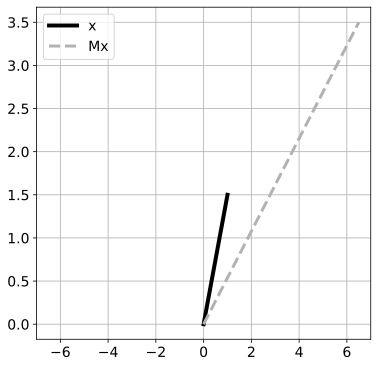

In [14]:
plt.figure(figsize=(6,6))

plt.plot([0,x[0,0]], [0,x[1,0]], 'k', linewidth=4, label='x')
plt.plot([0,Mx[0,0]],[0,Mx[1,0]], '--', linewidth=3, color=[.7,.7,.7],label='Mx')
plt.xlim([-7,7])
plt.xlim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_05_05a.png', dpi=300)
plt.show()

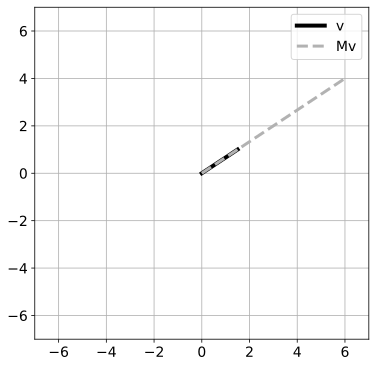

In [20]:
# some matrix
v = np.array([ [1.5,1] ]).T # transposed column into a vector
Mv = M@v

plt.figure(figsize=(6,6))

plt.plot([0,v[0,0]], [0,v[1,0]], 'k', linewidth=4, label='v')
plt.plot([0,Mv[0,0]], [0,Mv[1,0]], '--', linewidth=3, color=[.7,.7,.7],
        label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_05_05b.png', dpi=300)
plt.show()

# Coding Exercises

# Exercise 1

In [ ]:
# create a 3 x 4 matrix
matrix = np.arange(12).reshape(3,4)
# extract 2nd row, 4th column
sub_mat = matrix[1,3]

# print output
print(f'The matrix elemet at index (2,4) is {sub_mat}.')

# Exerices 2

This and the following exercise focus on slicing matrices to obtain submatrices. Start by creating matrix C in Figure 5-6, and use Python slicing to extract the submatrix comprising the first five rows and five columns. Let’s call this matrix C1. Try to reproduce Figure 5-6, but if you are struggling with the Python visualization coding, then just focus on extracting the submatrix correctly.

In [ ]:
Mrows = 10
Ncols = 10

C = np.arange(100).reshape(Mrows, Ncols)

C1 = C[:5,:5]
print('Original matrix\n')
print(C)

print('\n\nSubmatrix\n')
print(C1)

In [ ]:
# visualize the matrices as maps
_, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(C, cmap='gray', origin='upper',vmin=0, vmax=np.max(C))
axs[0].plot([4.5,4.5],[-0.5,9.5], 'w--')
axs[0].plot([-0.5,9.5],[4.5,4.5], 'w--')
axs[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(C):
    axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

axs[1].imshow(C1, cmap='gray', origin='upper', vmin=0, vmax=np.max(C))
axs[1].set_title('Submatrix')
# text labels
for (j,i),num in np.ndenumerate(C1):
    axs[1].text(i,j,num,color=[0.8,0.8,0.8],ha='center',va='center')

plt.savefig('Figure_05_06.png', dpi=300)
plt.show()

# Exercise 3

Expand this code to extract the other four 5 × 5 blocks. Then create a new matrix with those blocks reorganized according to Figure 5-7.
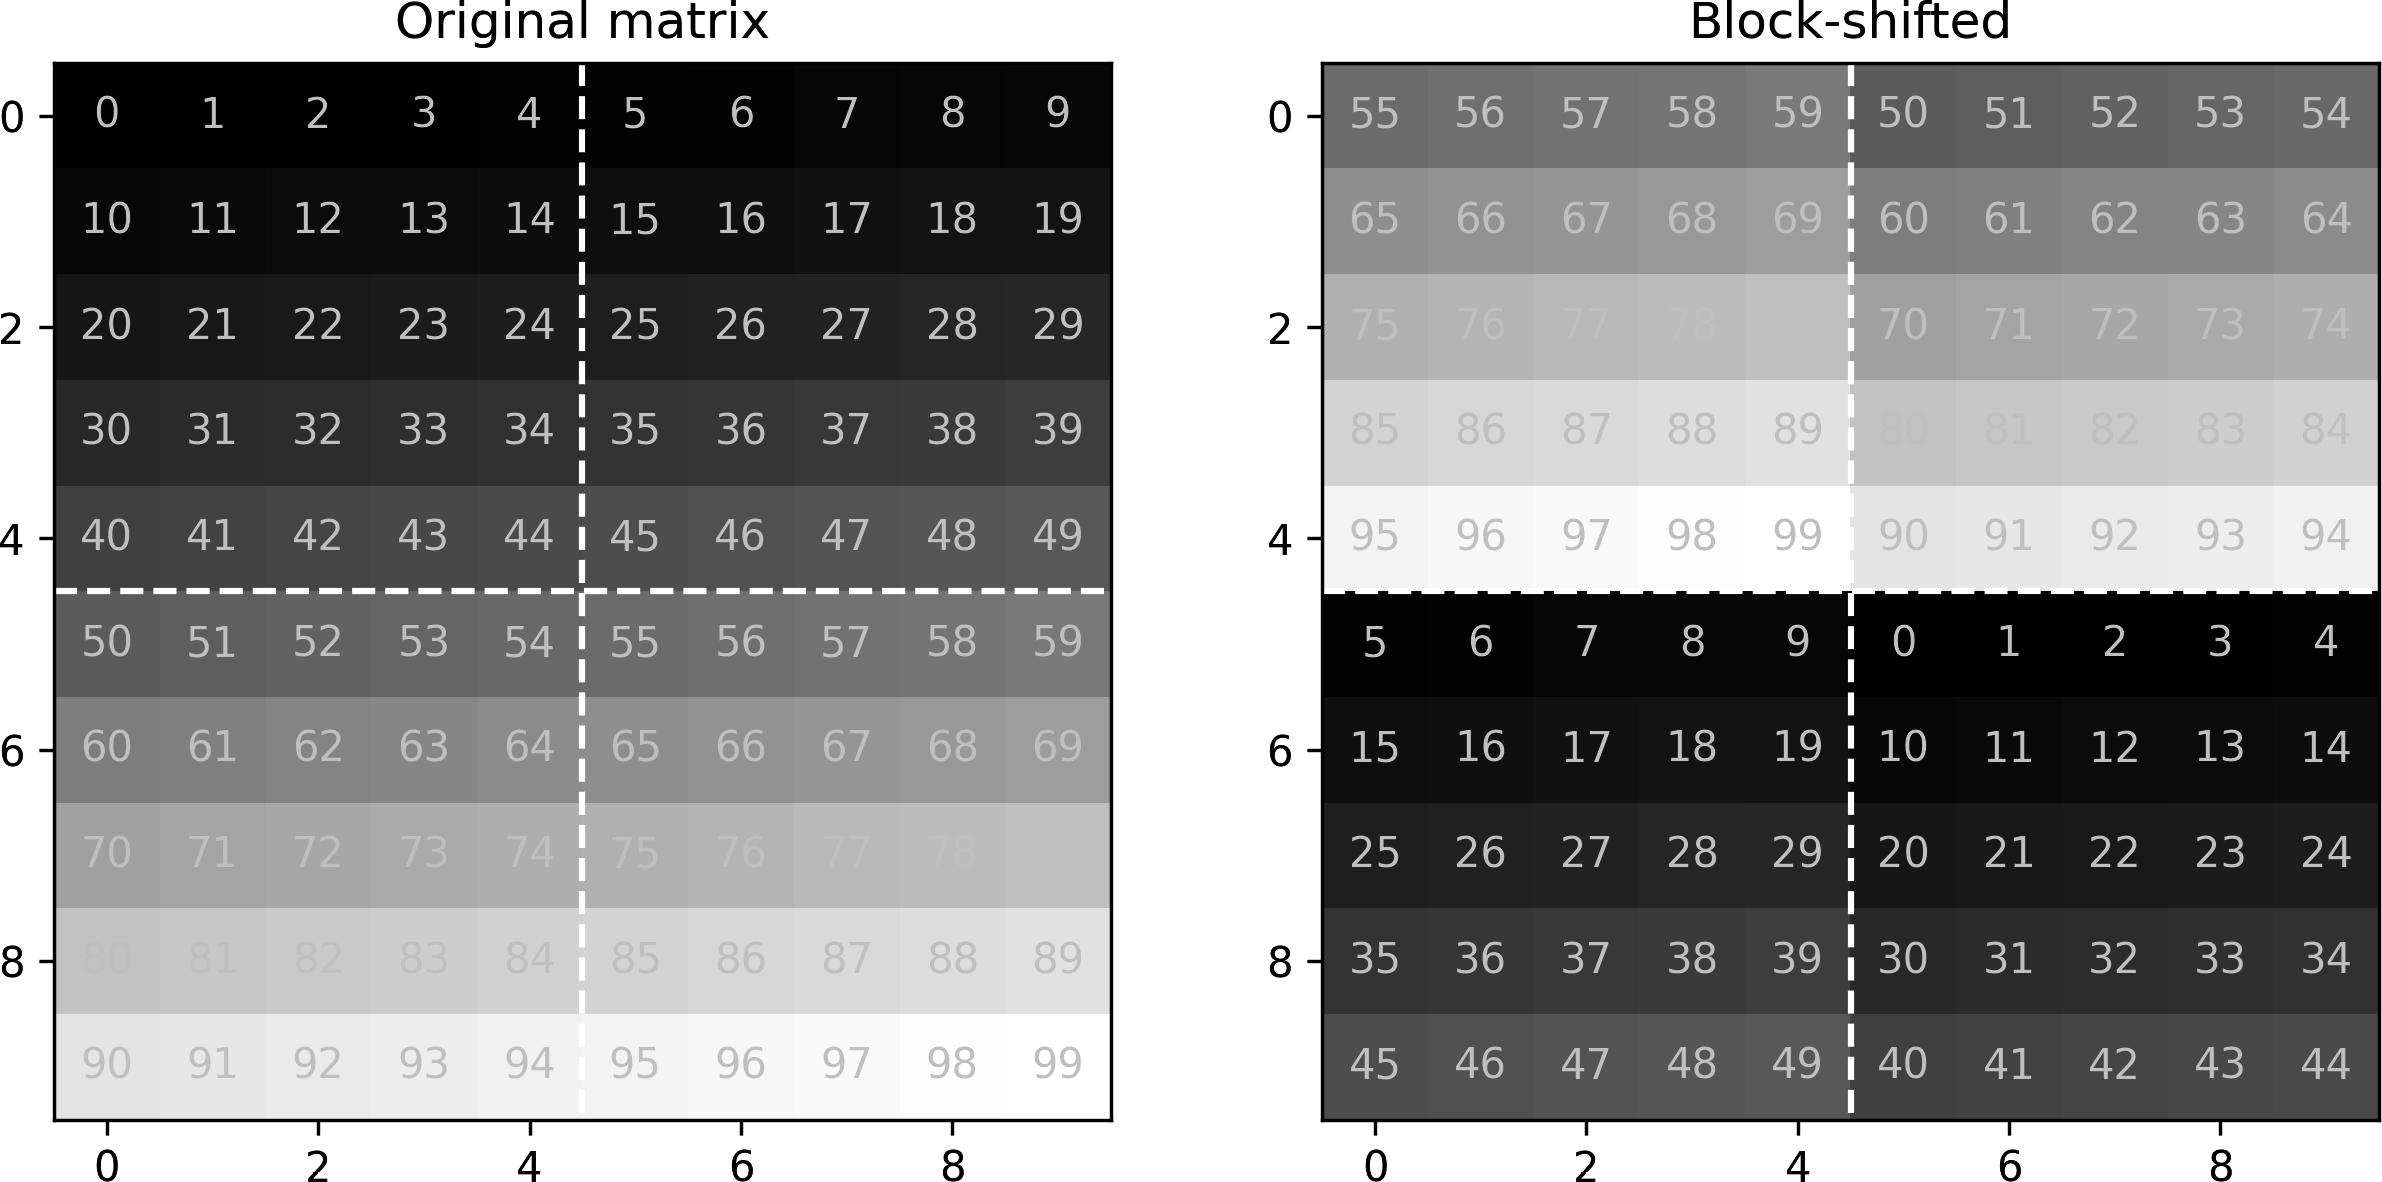

In [ ]:
# extract submtarixes
C1 = C[:5,:5]
C2 = C[:5,5:10]
C3 = C[5:10,:5]
C4 = C[5:10,5:10]

hor_stack1 = np.hstack((C4,C3))
hor_stack2 = np.hstack((C2,C1))
vert_stack = np.vstack((hor_stack1,hor_stack2))

# visualize
_, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].imshow(C, cmap='gray', origin='upper',vmin=0, vmax=np.max(C))
axs[0].plot([4.5,4.5],[-0.5,9.5], 'w--')
axs[0].plot([-0.5,9.5],[4.5,4.5], 'w--')
axs[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(C):
    axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

axs[1].imshow(vert_stack,cmap='gray', origin='upper', vmin=0, vmax=np.max(C))
axs[1].plot([4.5,4.5],[-0.5,9.5], 'w--')
axs[1].plot([-0.5,9.5],[4.5,4.5], 'w--')
axs[1].set_title('Block-shifted')
# text labels
for (j,i),num in np.ndenumerate(vert_stack):
    axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

plt.savefig('Figure_05_07.png', dpi=300)
plt.show()

In [ ]:
#??np.hstack

# Exercise 4

Implement matrix addition element-wise using two for loops over rows and columns. What happens when you try to add two matrices with mismatching sizes? This exercise will help you think about breaking down a matrix into rows, columns, and individual elements.

In [ ]:
Mrows = 5
Mcols = 5
A = np.arange(25).reshape(Mrows, Mcols)
B = np.ones((5,5), dtype=int)

def mat_add (A,B):
    if A.shape != B.shape:
        raise ValueError("Matrices does not have the same dimensions")
    else:
        # store the result here by initiating an empty matrices
        result = np.zeros_like(A) 

        # use for loops to iterate over rows
        for i in range(len(A)):
            # iterate over the columns
            for j in range(len(A[0])): 
                # add the 2 matrices by element wise and store them in result
                result[i,j] = A[i][j] + B[i][j]
    return result

mat_add(A, B)

# Exercise 5

Matrix addition and scalar multiplication obey the mathematical laws of commutivity and distributivity. That means that the following equations give the same results (assume that the matrices A and B are the same size and that σ is some scalar):

σ(A + B) = σA + σB = Aσ + Bσ

Rather than proving this mathematically, you are going to demonstrate it through coding. In Python, create two random-numbers matrices of size 3 × 4 and a random scalar. Then implement the three expressions in the previous equation. You’ll need to figure out a way to confirm that the three results are equal. Keep in mind that tiny computer precision errors in the range of 10−15 should be ignored.

In [ ]:
# 2 random matrices
E = np.random.randn(3,4)
F = np.random.randn(3,4)

# random scalar
s = np.random.randn()
print('E', E)
print('\n\nF', F)
print('\n\ns', s)

In [ ]:
equation_1 = s*(E + F)
equation_2 = (s*E) + (s*F)
equation_3 = (E*s) + (F*s)

# Different ways to be validated if they are equal

# 1. Using if else
# if equation_1.all() == equation_2.all():
#     print('equals')
# else:
#     print('not equals')

# if equation_1.all() == equation_3.all():
#     print('equals')
# else:
#     print('not equals')

# 2. if x=y=z, then 2x-y-z=0
print(np.round(2*equation_1 - equation_2 - equation_3, 8))

# Exercise 6

Code matrix multiplication using for loops. Confirm your results against using the numpy @ operator. This exercise will help you solidify your understanding of matrix multiplication, but in practice, it’s always better to use @ instead of writing out a double for loop.

In [ ]:
# Create a few matrices
A = np.random.randint(1,50,(3,6))
B = np.random.randint(1,50,(6,4))
print (A)
print (B)

In [ ]:

# Store the results with the size of rows of the left matrix and cols of the right matrix
results = np.zeros( (A.shape[0], B.shape[1]), dtype=int )
# results = np.zeros()

# Create for loop
# Solution #1
for i in range(A.shape[0]): # rows of A
    # print('A - row', i)
    for j in range(B.shape[1]): # cols of B
        # print('B - col', j)
        for k in range(A.shape[1]): # shared dimension
            # print('Shared', k)
            results[i,j] += A[i, k] * B[k, j]
            # print(i,j, A[i, k], B[k, j])

print('results:',results)

numpy_res = A@B
print('numpy:', numpy_res)

print((A@B) - (numpy_res))
np.isclose(results, numpy_res)

# Exercise 7

Confirm the LIVE EVIL rule using the following five steps: 

`(1)` Create four matrices of random numbers, setting the sizes to be **L** ∈ ℝ^2 × 6, **I** ∈ ℝ^6 × 3, **V** ∈ ℝ3 × 5, and **E** ∈ ℝ5 × 2. 

`(2)` Multiply the four matrices and transpose the product. 

`(3)` Transpose each matrix individually and multiply them without reversing their order. 

`(4)` Transpose each matrix individually and multiply them reversing their order according to the LIVE EVIL rule. Check whether the result of step 2 matches the results of step 3 and step 4. 

`(5)` Repeat the previous steps but using all square matrices.

# Exercise 8

In this exercise, you will write a Python function that checks whether a matrix is symmetric. It should take a matrix as input, and should output a boolean `True` if the matrix is symmetric or `False` if the matrix is nonsymmetric. Keep in mind that small computer rounding/precision errors can make “equal” matrices appear unequal.

# Exercise 9

I mentioned that there is an additive method for creating a symmetric matrix from a nonsymmetric square matrix. The method is quite simple: average the matrix with its transpose. Implement this algorithm in Python and confirm that the result really is symmetric. (Hint: you can use the function you wrote in the previous exercise!)

# Exercise 10

Repeat the second part of Exercise 3-3 (the two vectors in ℝ3), but use matrix-vector multiplication instead of vector-scalar multiplication. That is, compute As instead of σ1**v**1 + σ2**v**2.

# 